In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# titanic datasin

df = pd.read_csv('../Titanic_Dataset.csv')
df.columns = [
    'pclass', 'survived', 'name', 'gender', 'age', 'sibsp', 'parch',
    'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home_dest'
]

print("birinchi 10 nafar malumotlar:")
print(df.head(10))
print("dataset haqida  formasi", df.shape)
print("stolb tushunlari:")
print(df.info())


birinchi 10 nafar malumotlar:
   pclass  survived                                             name  gender  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
5       1         1                              Anderson, Mr. Harry    male   
6       1         1                Andrews, Miss. Kornelia Theodosia  female   
7       1         0                           Andrews, Mr. Thomas Jr    male   
8       1         1    Appleton, Mrs. Edward Dale (Charlotte Lamson)  female   
9       1         0                          Artagaveytia, Mr. Ramon    male   

     age  sibsp  parch    ticket      fare    cabin embarked boat   body  \
0  29.00     

In [15]:
#Tirik qqlgan analizi

#butun statistika

print("="*60 )
print(" Butun Statistika  tiriklarni")
print ("=" * 60)

survived_counts =df['survived'].value_counts().sort_index()

print ("Odam soni")
print (f"Tirik qolgan (1): {survived_counts[1]} odam")
print(f"Ulgan(0): {survived_counts[0]} odam")
print(f"umumiy:{len(df)} miqdori")

#foiz statistikasi
survived_pct = df["survived"].value_counts(normalize=True).sort_index()*100
print(f"\nTirik qolgan foizi: {survived_pct[1]:.2f}%")
print(f"Ulgan foizi: {survived_pct[0]:.2f}%")


 Butun Statistika  tiriklarni
Odam soni
Tirik qolgan (1): 500 odam
Ulgan(0): 809 odam
umumiy:1309 miqdori

Tirik qolgan foizi: 38.20%
Ulgan foizi: 61.80%


In [20]:
import pandas as pd

# 2. Jins bo`yicha abaliz`
print("\n" + "=" * 60)
print("jins tirik qolish analizi ")
print("=" * 60)

gender_survival = pd.crosstab(df['gender'], df['survived'], margins=True)
print("\njins omon qolish bo`yicha yo`lovchilar soni:")
print(gender_survival)

# jins omon qolgan foizi
print("\nJins bo`yicha omon qolish foizi:")
gender_survival_pct = pd.crosstab(df['gender'], df['survived'], normalize='index') * 100
print(gender_survival_pct.round(2))


jins tirik qolish analizi 

jins omon qolish bo`yicha yo`lovchilar soni:
survived    0    1   All
gender                  
female    127  339   466
male      682  161   843
All       809  500  1309

Jins bo`yicha omon qolish foizi:
survived      0      1
gender                
female    27.25  72.75
male      80.90  19.10


In [17]:
# 3. Chipta sinfi bo`yicha omon qolish analiza
print("\n" + "=" * 60)
print(" Chipta sinfi omon qolish analiza")
print("=" * 60)

class_survival = pd.crosstab(df['pclass'], df['survived'], margins=True)
print("\nSinf bo`yicha yo`lovchilar soni va omon qoloshi:")
print(class_survival)

#Sinf bo`yicha omon qolosh foizi
print("\nSinf bo`yicha omon qolosh foizi:")
class_survival_pct = pd.crosstab(df['pclass'], df['survived'], normalize='index') * 100
print(class_survival_pct.round(2))


 Chipta sinfi omon qolish analiza

Sinf bo`yicha yo`lovchilar soni va omon qoloshi:
survived    0    1   All
pclass                  
1         123  200   323
2         158  119   277
3         528  181   709
All       809  500  1309

Sinf bo`yicha omon qolosh foizi:
survived      0      1
pclass                
1         38.08  61.92
2         57.04  42.96
3         74.47  25.53


In [18]:
# 4.Jins va klass boyicha qo`shma analiz`
print("\n" + "=" * 60)
print("JINS VA KLASS BO`YICHA OMON QOLISH ANALIZI")
print("=" * 60)

gender_class_survival = pd.crosstab([df['gender'], df['pclass']], df['survived'])
print("\nklass bo`yicha yo`lovchilar soni va omon qolgan:")
print(gender_class_survival)


JINS VA KLASS BO`YICHA OMON QOLISH ANALIZI

klass bo`yicha yo`lovchilar soni va omon qolgan:
survived         0    1
gender pclass          
female 1         5  139
       2        12   94
       3       110  106
male   1       118   61
       2       146   25
       3       418   75


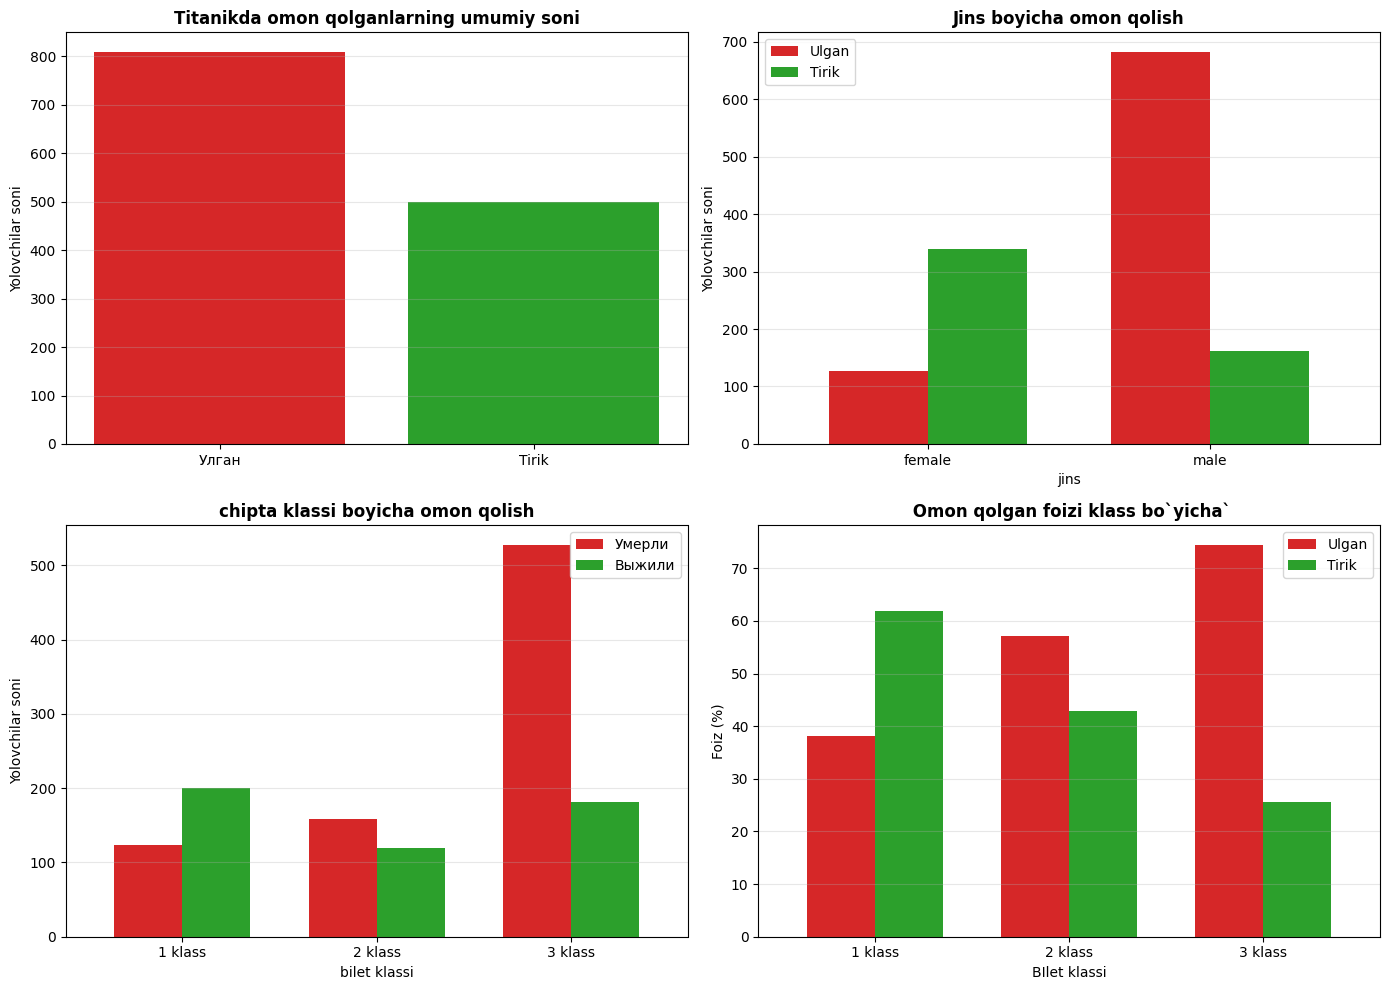


Vizualizatsiya graffiki yaratildi!


In [19]:
# 5. Natija vizualizatsiyasi
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# График 1:Omon qolishning umumiy taqsimoti
ax1 = axes[0, 0]
survived_labels = ['Улган', 'Tirik']
survived_counts_list = [df[df['survived'] == 0].shape[0], df[df['survived'] == 1].shape[0]]
colors = ['#d62728', '#2ca02c']
ax1.bar(survived_labels, survived_counts_list, color=colors)
ax1.set_ylabel('Yolovchilar soni')
ax1.set_title('Titanikda omon qolganlarning umumiy soni', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# График 2: Jins boyicha omon qolish
ax2 = axes[0, 1]
gender_data = pd.crosstab(df['gender'], df['survived'])
gender_data.plot(kind='bar', ax=ax2, color=colors, width=0.7)
ax2.set_title('Jins boyicha omon qolish', fontsize=12, fontweight='bold')
ax2.set_ylabel('Yolovchilar soni')
ax2.set_xlabel('jins')
ax2.legend(['Ulgan', 'Tirik'], loc='upper left')
ax2.grid(axis='y', alpha=0.3)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

# График 3: omon qolgan klass boyicha
ax3 = axes[1, 0]
class_data = pd.crosstab(df['pclass'], df['survived'])
class_data.plot(kind='bar', ax=ax3, color=colors, width=0.7)
ax3.set_title('chipta klassi boyicha omon qolish', fontsize=12, fontweight='bold')
ax3.set_ylabel('Yolovchilar soni')
ax3.set_xlabel('bilet klassi')
ax3.legend(['Умерли', 'Выжили'], loc='upper right')
ax3.grid(axis='y', alpha=0.3)
ax3.set_xticklabels(['1 klass', '2 klass', '3 klass'], rotation=0)

# График 4: omon qolgan foizi klass bo`yicha`
ax4 = axes[1, 1]
class_pct = pd.crosstab(df['pclass'], df['survived'], normalize='index') * 100
class_pct.plot(kind='bar', ax=ax4, color=colors, width=0.7)
ax4.set_title(' Omon qolgan foizi klass bo`yicha`', fontsize=12, fontweight='bold')
ax4.set_ylabel('Foiz (%)')
ax4.set_xlabel('BIlet klassi')
ax4.legend(['Ulgan', 'Tirik'], loc='upper right')
ax4.grid(axis='y', alpha=0.3)
ax4.set_xticklabels(['1 klass', '2 klass', '3 klass'], rotation=0)

plt.tight_layout()
plt.show()

print("\nVizualizatsiya graffiki yaratildi!")


Chat took too long to get ready. Please ensure you are signed in to GitHub and that the extension `GitHub.copilot-chat` is installed and enabled.